In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import cv2
import os
import math

from AdvancedLaneFinding import *

In [2]:
'''def camera_calibration(objpoints, imgpoints, gray):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    

def distortion_correction():
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
def Perspective_Transformation(img, src):
    #defining the offset for the bird eye view camera
    offset = 
    dst = 
    M = cv2.getPerspectiveTransform()
    
    warped = cv2.warpPerspective(img, M, img_size, flags = cv2.INTER_LINEAR)

    return warped'''

'def camera_calibration(objpoints, imgpoints, gray):\n    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)\n    \n\ndef distortion_correction():\n    dst = cv2.undistort(img, mtx, dist, None, mtx)\n    \ndef Perspective_Transformation(img, src):\n    #defining the offset for the bird eye view camera\n    offset = \n    dst = \n    M = cv2.getPerspectiveTransform()\n    \n    warped = cv2.warpPerspective(img, M, img_size, flags = cv2.INTER_LINEAR)\n\n    return warped'

In [3]:
'''def __main__():
    #initializing the servies
    
    #Calling the Images
    
    #Calling the Videos 
    
    #calling the Pipeline functions
    
__main__()'''

'def __main__():\n    #initializing the servies\n    \n    #Calling the Images\n    \n    #Calling the Videos \n    \n    #calling the Pipeline functions\n    \n__main__()'

In [4]:
'''##Visualization ##
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)'''

'##Visualization ##\n# Create an image to draw the lines on\nwarp_zero = np.zeros_like(warped).astype(np.uint8)\ncolor_warp = np.dstack((warp_zero, warp_zero, warp_zero))\n\n# Recast the x and y points into usable format for cv2.fillPoly()\npts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])\npts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])\npts = np.hstack((pts_left, pts_right))\n\n# Draw the lane onto the warped blank image\ncv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))\n\n# Warp the blank back to original image space using inverse perspective matrix (Minv)\nnewwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) \n# Combine the result with the original image\nresult = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)\nplt.imshow(result)'

In [5]:
'''#testing the best warp approach
img = mpimg.imread("test_images/test1.jpg")
gray = grayscale(img)
nx = 6
ny = 7
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
plt.imshow(gray)
undist = cv2.undistort(img, nx, ny)

#src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])'''

'#testing the best warp approach\nimg = mpimg.imread("test_images/test1.jpg")\ngray = grayscale(img)\nnx = 6\nny = 7\nret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)\nplt.imshow(gray)\nundist = cv2.undistort(img, nx, ny)\n\n#src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])'

In [6]:
IMAGE_SIZE=(720, 1280)
CHESSBOARD_IMAGE_DIR = "camera_cal"
TEST_IMAGE_DIR = "test_images"
INPUT_VIDEO_DIR= "input_videos"
OUTPUT_IMAGE_DIR = "output_images"
OUTPUT_VIDEO_DIR = "output_videos"
ABSOLUTE_SOBEL_X = (7, 20, 100)
ABSOLUTE_SOBEL_Y = (7, 20, 100)
MAGNITUDE_SOBEL = (3, 30, 100)
DIRECTION_SOBEL = (31, 0.5, 1.0)
S_CHANNEL_THRESHOLD = (170, 255)
WARP_SRC = np.float32([(532, 496),
                       (756, 496),
                       (288, 664),
                       (1016, 664)])
WARP_DST = np.float32([(WARP_SRC[2][0], WARP_SRC[2][1] - 200),
                       (WARP_SRC[3][0], WARP_SRC[3][1] - 200),
                       (WARP_SRC[2][0], WARP_SRC[2][1]),
                       (WARP_SRC[3][0], WARP_SRC[3][1])])
SLIDING_WINDOW_PARAMS = (9, 100, 50)
METERS_PER_PIXEL_Y = 30 / 720
METERS_PER_PIXEL_X = 3.7 / 700
MAX_RECENT_XFITTED = 10
LANE_DETECTION_FAILURE_COUNT_BEFORE_SLIDING_WINDOW=20
REGION_OF_INTEREST_VERTS = np.array([[
            (0, IMAGE_SIZE[0]),
            (IMAGE_SIZE[1] / 2, IMAGE_SIZE[0] / 2 + 45),
            (IMAGE_SIZE[1] / 2, IMAGE_SIZE[0] / 2 + 45),
            (IMAGE_SIZE[1],     IMAGE_SIZE[0])
        ]], dtype = np.int32)

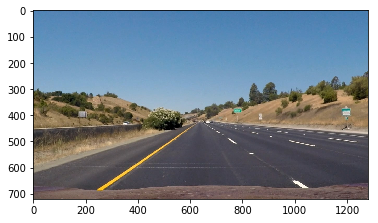

In [7]:
image = mpimg.imread("test_images/straight_lines1.jpg")

'''LaneFinder = AdvanceLaneFinding(image_size=IMAGE_SIZE,
    chessboard_image_dir=CHESSBOARD_IMAGE_DIR,
    absolute_sobel_x=ABSOLUTE_SOBEL_X,
    absolute_sobel_y=ABSOLUTE_SOBEL_Y,
    magnitude_sobel=MAGNITUDE_SOBEL,
    direction_sobel=DIRECTION_SOBEL,
    s_channel_thresh=S_CHANNEL_THRESHOLD,
    warp_perspective=(WARP_SRC, WARP_DST),
    sliding_window_params=SLIDING_WINDOW_PARAMS,
    meters_per_pixel=(METERS_PER_PIXEL_Y, METERS_PER_PIXEL_X),
    max_recent_xfitted=MAX_RECENT_XFITTED,
    lane_detection_failure_count_before_sliding_window=LANE_DETECTION_FAILURE_COUNT_BEFORE_SLIDING_WINDOW,
    region_of_interest_verts=REGION_OF_INTEREST_VERTS)'''

# initialize class instance containing advanced lane line detection methods
LaneFinder = AdvancedLaneFinder(
    image_size=IMAGE_SIZE,
    chessboard_image_dir=CHESSBOARD_IMAGE_DIR,
    absolute_sobel_x=ABSOLUTE_SOBEL_X,
    absolute_sobel_y=ABSOLUTE_SOBEL_Y,
    magnitude_sobel=MAGNITUDE_SOBEL,
    direction_sobel=DIRECTION_SOBEL,
    s_channel_thresh=S_CHANNEL_THRESHOLD,
    warp_perspective=(WARP_SRC, WARP_DST),
    sliding_window_params=SLIDING_WINDOW_PARAMS,
    meters_per_pixel=(METERS_PER_PIXEL_Y, METERS_PER_PIXEL_X),
    max_recent_xfitted=MAX_RECENT_XFITTED,
    lane_detection_failure_count_before_sliding_window=LANE_DETECTION_FAILURE_COUNT_BEFORE_SLIDING_WINDOW,
    region_of_interest_verts=REGION_OF_INTEREST_VERTS,
)

plt.imshow(image)

In [10]:
result = LaneFinder.pipeline(image)

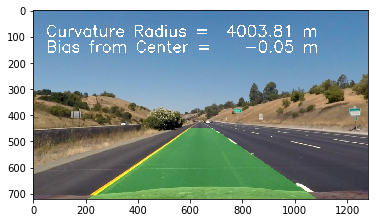

In [11]:
plt.imshow(result)